In [28]:
pip install transformers torch datasets --quiet

In [29]:
import pandas as pd
df = pd.read_csv('/content/UNBER-text.csv')
df

,text,class,source,category
0,Me on my way to watch Oppenheimer After Berbie,Safe,Facebook,Safe
1,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,Adult,Facebook,Unsafe
2,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,Safe,Facebook,Safe
3,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,Safe,Facebook,Safe
4,ইন্ডিয়ান কাক্কু আহ সোনা গো আমার একদম পয়েন্টে গ...,Adult,Facebook,Unsafe
...,...,...,...,...
8260,"সাব্বাস,,,,,,,হিরো আলম ভাই,,,I Like U andI dis...",Safe,bangla_comment_dataset,Safe
8261,"আমার অনুরোধ আপনাদের নিকট, আপনারা দলের হাইকমান...",Safe,bangla_comment_dataset,Safe
8262,ভালো ছিলো কাজ,Safe,bangla_comment_dataset,Safe
8263,"হিরো আলম ভাইয়ার প্রতি সর্বখন নেক দোয়া রইল ,আর ...",Safe,bangla_comment_dataset,Safe


In [30]:
df['class'].value_counts()

,count
class,
Safe,4662
Adult,1527
Harmful,1172
Suicidal,904


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df1 = df[df['category']=="Unsafe"]

In [33]:
df1['class'], uniques = pd.factorize(df1['class'])
uniques

<ipython-input-33-89a296d6568f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['class'], uniques = pd.factorize(df1['class'])


Index(['Adult', 'Harmful', 'Suicidal'], dtype='object')

In [34]:
df = df1
df

,text,class,source,category
1,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,0,Facebook,Unsafe
4,ইন্ডিয়ান কাক্কু আহ সোনা গো আমার একদম পয়েন্টে গ...,0,Facebook,Unsafe
7,এমন এমন বন্ধু হতে সাবধান হতে সাবধান,0,Facebook,Unsafe
16,পেছন থেকে সবাই সুন্দর nura,0,Facebook,Unsafe
19,আর সাহস দেখাবি জীবনে বেশি সাহস দেখাইয়া পোলায় প...,1,Facebook,Unsafe
...,...,...,...,...
5260,শুন ভাই তুই মইরা যা।আর কিছু কমুনা।ও হ মরার আগে...,0,toxic_comments,Unsafe
5261,বিএসএফ চদা,0,toxic_comments,Unsafe
5262,আঁকাবাঁকা পথযে তোর পুটকি দিয়া ডুইকা যায় নাই ঐট...,0,toxic_comments,Unsafe
5263,বিচিলেস বস আরিফ খানের এই ছবি ইতিহাসের পাতায় অম...,0,toxic_comments,Unsafe


In [35]:
df = df.sample(frac=1).reset_index(drop=True)
df

,text,class,source,category
0,মুঞ্চায় তর পুটকির ভিত্রে ভালোবাসা দিবসটা টুকি...,0,toxic_comments,Unsafe
1,বউয়ের ব্যাগ থেকে এক্সপায়ার্ড গাঁজা চুরি করে খা...,1,bengali_hate,Unsafe
2,দুইটাই সমকামি,1,toxic_comments,Unsafe
3,চোদনা,0,toxic_comments,Unsafe
4,মরে যাওয়ায় মনে হয় সব কিছুর সমাধান। \nমানসিক রো...,2,BanglaSAPM,Unsafe
...,...,...,...,...
3598,"সাধারন হতে পারি, তবে সস্তা নই",2,BanglaSAPM,Unsafe
3599,পাশের মানুষটার থেকে এটুকু সাহস পেলে আর কোনোকিছ...,2,BanglaSAPM,Unsafe
3600,বল্লম ওর বিতরে ডুকানো হোক ওয়াস করার জন্য,0,bengali_hate,Unsafe
3601,নুনু খা গিয়া দুই মাগি,0,toxic_comments,Unsafe


In [36]:
df = df[df['text']!='[NULL]']
df.shape

(3603, 4)

In [37]:
X = df['text']
y = df['class']

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

test_texts, val_texts, test_labels, val_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

In [38]:
from transformers import AutoTokenizer

# Load the tokenizer (you can use 'bert-base-multilingual-cased', 'xlm-roberta-base', or 'csebuetnlp/banglabert')
model_name = "csebuetnlp/banglabert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [39]:
import torch
from datasets import Dataset

# Convert data into Hugging Face Dataset format
train_data = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_data = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})
test_data = Dataset.from_dict({"text": test_texts.tolist(), "label": test_labels.tolist()})

In [40]:
def preprocess_function(examples):
    return tokenizer(
        examples['text'],
        padding=True,
        truncation=True,
        max_length=512,
)

In [41]:
train_data = train_data.map(preprocess_function, batched=True)
val_data = val_data.map(preprocess_function, batched=True)
test_data = test_data.map(preprocess_function, batched=True)

Map:   0%|          | 0/2882 [00:00<?, ? examples/s]

Map:   0%|          | 0/361 [00:00<?, ? examples/s]

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

In [42]:
train_data

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2882
})

In [43]:
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [44]:
from transformers import AutoModel

model = AutoModel.from_pretrained(model_name, num_labels=3)

In [45]:
import torch
import torch.nn as nn

class BanglaBERT_LSTM_Multiclass(nn.Module):
    def __init__(self, lstm_hidden_size=256, lstm_layers=1, dropout=0.3, num_classes=3):
        super(BanglaBERT_LSTM_Multiclass, self).__init__()

        # ✅ Load BanglaBERT inside the class
        self.bert = model  # Example, change to correct model

        # ✅ LSTM Layer (Bidirectional)
        self.lstm = nn.LSTM(input_size=768, hidden_size=lstm_hidden_size, num_layers=lstm_layers,
                            batch_first=True, bidirectional=True, dropout=dropout)

        # ✅ Fully connected classification layer (for multiclass)
        self.fc = nn.Linear(lstm_hidden_size * 2, num_classes)  # ⬅ Output size for multiclass classification

        # ✅ Dropout layer for regularization
        self.dropout = nn.Dropout(dropout)

        # ✅ Use CrossEntropyLoss for multiclass classification
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, input_ids, attention_mask, labels=None):
        # Get embeddings from BanglaBERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state  # (batch_size, seq_len, 768)

        # Pass through BiLSTM
        lstm_out, _ = self.lstm(hidden_states)  # (batch_size, seq_len, hidden_size*2)
        lstm_out = lstm_out[:, -1, :]  # Take the last time step output

        # Pass through the classifier
        logits = self.fc(self.dropout(lstm_out))  # (batch_size, num_classes)

        # Compute loss if labels are provided
        loss = None
        if labels is not None:
            loss = self.criterion(logits, labels)

        return (loss, logits) if loss is not None else logits

In [46]:
model = BanglaBERT_LSTM_Multiclass()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


In [47]:
from transformers import TrainingArguments, EarlyStoppingCallback

In [48]:
# pip install evaluate --quiet

In [49]:
# import evaluate
# import numpy as np

# # Load metrics using the evaluate library
# f1_metric = evaluate.load("f1")
# precision_metric = evaluate.load("precision")
# recall_metric = evaluate.load("recall")

In [50]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

def compute_metrics_multiclass(eval_pred):
    logits, labels = eval_pred

    # Convert logits to predicted class indices (argmax)
    predictions = torch.argmax(torch.tensor(logits), dim=-1).numpy()  # Shape: (batch_size,)

    # Compute metrics for multiclass classification (use average="macro" or "weighted")
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="macro", zero_division=1  # Change to "weighted" if needed
    )

    acc = accuracy_score(labels, predictions)

    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [51]:
# train_data.rename_column("label", "labels")
# val_data.rename_column("label", "labels")
# test_data.rename_column("label", "labels")

In [52]:
def make_model_contiguous(model):
    for param in model.parameters():
        param.data = param.data.contiguous()  # ✅ Ensure tensor is contiguous
        if param.grad is not None:
            param.grad.data = param.grad.data.contiguous()

make_model_contiguous(model)

In [53]:
training_args = TrainingArguments(
    output_dir="./banglabert_lstm",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    logging_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=6,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [54]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         # Pretrained model
    args=training_args,                  # Updated training arguments
    train_dataset=train_data,            # Training data
    eval_dataset=val_data,               # Validation data
    tokenizer=tokenizer,                 # Tokenizer
    compute_metrics=compute_metrics_multiclass,      # Updated metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer.train()

<ipython-input-54-2a1b6544a79d>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.770700,0.564407,0.761773,0.776062,0.785247,0.777667
2,0.501400,0.503431,0.778393,0.802224,0.801671,0.797965
3,0.380600,0.513888,0.806094,0.815720,0.817424,0.816397
4,0.278700,0.598062,0.800554,0.810212,0.811726,0.810728
5,0.222100,0.724354,0.789474,0.805489,0.794010,0.796395
6,0.191300,0.752539,0.792244,0.807405,0.800881,0.803557


TrainOutput(global_step=2166, training_loss=0.39081622799127497, metrics={'train_runtime': 1783.2125, 'train_samples_per_second': 9.697, 'train_steps_per_second': 1.215, 'total_flos': 0.0, 'train_loss': 0.39081622799127497, 'epoch': 6.0})

In [55]:
import numpy as np
from sklearn.metrics import classification_report
import torch

# Get predictions from the trainer
predictions = trainer.predict(test_data)

# ✅ Convert logits to probabilities using softmax for multiclass classification
probs = torch.softmax(torch.tensor(predictions.predictions), dim=-1)

# ✅ Convert probabilities to predicted labels (class with highest probability)
predicted_labels = torch.argmax(probs, dim=-1).numpy()

# ✅ Print classification report for multiclass classification
print(classification_report(test_labels, predicted_labels, digits=4))

              precision    recall  f1-score   support

           0     0.7697    0.7647    0.7672       153
           1     0.6818    0.6410    0.6608       117
           2     0.8776    0.9556    0.9149        90

    accuracy                         0.7722       360
   macro avg     0.7764    0.7871    0.7810       360
weighted avg     0.7681    0.7722    0.7695       360



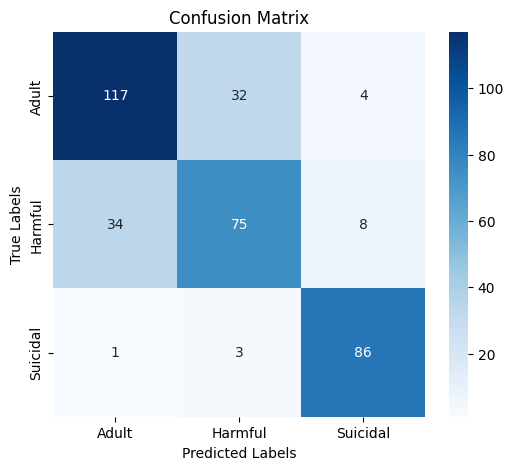

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=uniques, yticklabels=uniques)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
trainer.save_model("/content/drive/MyDrive/SafeReels-664/Models/Text_models/BB-h2")